## Numpy Basics: Arrays and Vector Computation

In [47]:
import numpy as np # no need to pip install, since it comes with Anaconda
np.random.seed(12345) # this ensures any random numbers have an arbitrary seed
np.set_printoptions(precision=4) # we will always print numbers to 4dp

In [2]:
c  =1.23456
print(c) # this is not using Numpy!!!

1.23456


In [3]:
# we use array-range in Numpy
my_ar = np.arange(1000000) # this is an array-range limited only by resources
my_ar
type(my_ar) # it is an n-dimensional array

numpy.ndarray

### Numpy arrays are efficient partly because they allow only one data type

In [4]:
# explore the performance of a Numpy array versus a normal python range
l = list(range(1000000)) # a million
# jupyter has an immediate syntax like this
%time for i in range(10):my_ar2 = my_ar*2 # multiply every member by 2
%time for i in range(10):l2     = [x*2 for x in l]

Wall time: 18 ms
Wall time: 839 ms


In [5]:
# arrays can be multidimentional
data = np.random.randn(2,3) # this is a 2 by 3 array
# remember = more than one __repr__ will show a tuple
data, data*3 # all the usual maths operators work

(array([[-0.2047,  0.4789, -0.5194],
        [-0.5557,  1.9658,  1.3934]]),
 array([[-0.6141,  1.4368, -1.5583],
        [-1.6672,  5.8973,  4.1802]]))

In [6]:
# arrays have a shape and a type
data.shape
data.dtype # the dataa type of the members of this array

dtype('float64')

In [7]:
d2 = [[7,6,5,4],[-2,-3,-4,-5]] # list of lists
ar3 = np.array(d2)
ar3.dtype
ar3.ndim
ar3.shape

(2, 4)

### Numpy has several constructors for Arrays

In [8]:
z = np.zeros((3,4,2)) # multi-dimensional
z
e = np.empty((2,3)) # the memory used may not actually be empty
e

array([[0.6141, 1.4368, 1.5583],
       [1.6672, 5.8973, 4.1802]])

In [9]:
# we can force a dat aatype
a1 = np.array([1,2,3], dtype=np.float32)
a1.dtype
a1
a_i = a1.astype(np.int64)
a_i.dtype

dtype('int64')

In [10]:
n_s = np.array(['1.25', '9.6', '-42'], dtype=np.string_)
n_s.dtype
n_f = n_s.astype(float)
n_f.dtype

dtype('float64')

In [11]:
e ** n_f

array([[5.4365e-01, 3.2441e+01, 8.0996e-09],
       [1.8944e+00, 2.5021e+07, 8.1217e-27]])

In [12]:
e < n_f

array([[ True,  True, False],
       [False,  True, False]])

### We can Slice Arrays much like Slicing other Python collections

In [13]:
a = np.arange(10)
a[5:8]
a[1:9:3] # start, stop-before, step
a_s = a[5:9] # creates a ref to the original
a[6] = -9 # mutate the original array
a
a_s # the reference also updates

array([ 5, -9,  7,  8])

In [14]:
# we can create copies with no reference
b = a.copy() # a copy with no reference to the original
b

array([ 0,  1,  2,  3,  4,  5, -9,  7,  8,  9])

In [15]:
a[7] = 99
a

array([ 0,  1,  2,  3,  4,  5, -9, 99,  8,  9])

In [16]:
b # copy so has not been altered

array([ 0,  1,  2,  3,  4,  5, -9,  7,  8,  9])

### Using Indexing

In [19]:
names = np.array(['Amy', 'Beater', 'Cathy', 'Deidre'])
data  = np.random.randn(4,3)
names
data

array([[ 0.0929,  0.2817,  0.769 ],
       [ 1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529],
       [ 0.8864, -2.0016, -0.3718]])

In [27]:
names >= 'B' # or names == 'Amy'
data[names=='Beater'] # False, True, False, False

array([[ 1.2464,  1.0072, -1.2962]])

### Remember - Correlation is NOT causation

## Reshaping Data

In [29]:
# most operations in Numpy an Pandas are not persistent
arr = np.arange(32) # one-dimentional array

In [31]:
arr.reshape(8,4) # an 8 by 4 array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [32]:
arr # it's still one dimentioanl

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [37]:
arr2 = arr.reshape(8,4)
arr2 # persists the output of the reshaoe of 'arr'

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [35]:
arr3 = arr2.T # T for transpose
arr2 # 8 by 4
arr3 # 4 by 8

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

### Numpy has 'dot' arithmetic

In [36]:
r = np.dot(arr2.T, arr2)
r

array([[2240, 2352, 2464, 2576],
       [2352, 2472, 2592, 2712],
       [2464, 2592, 2720, 2848],
       [2576, 2712, 2848, 2984]])

In [42]:
# simpler example
da = np.array([2,1,1,1])
da.reshape(2,2)
db = np.array([10,20,30,40])
db.reshape(2,2)
s = np.dot(da, db)
s

110

### Fast element-wise Array Functions

In [48]:
arr = np.arange(10)
np.sqrt(arr) # remember we are outputing to 4dp after any calculations

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [54]:
np.exp(arr)
np.median(arr) # median for 0,1,2,3,4,5,6,7,8,9 is 4.5

4.5

In [68]:
# vectorize
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b
vfunc = np.vectorize(myfunc)
%time vfunc([1, 2, 3, 4], [4,3,2,1])

# we can just call these directly in to hte fn
def fn():
    for a in range(1,5):
        print(myfunc(a, 2))
%time fn()
    

Wall time: 0 ns
3
4
1
2
Wall time: 0 ns


### Array-Oriented Programming

#### Reading in External Data Files

In [79]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# generate from text genfromtxt
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float')
iris_2d.shape

(150, 5)

In [81]:
# we can store this data locally
np.save('iris_arr.npy', iris_2d) # saves to the root of where Jupyter is running

In [88]:
retrieved = np.load('iris_arr.npy')
retrieved
# we may choose to compress the data on save
np.savez_compressed('iris_compressed.npz', i=iris_2d, d=arr) # two arrays in one file

In [90]:
# load in the same way
archived = np.load('iris_compressed.npz')
archived['d']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
# we can delete files
# excalamation mark will try to invoke a command on the command line
!del iris_compressed.npz # !rm on linux

C:\Users\rb17\Documents\jupyter\iris_compressed.npz


The process cannot access the file because it is being used by another process.


### Data Visualization with Numpy (and MatPlotLib)

In [98]:
nums = np.array([0.5, 0.7, 1.0, 1.2, 1.3, 2.1])
nums
bins_ = np.array([-1,0,1,2,3,4]) # bins into which I will group my numbers

In [93]:
# we need MatPlotLib
import matplotlib.pyplot as plt

(array([0., 2., 3., 1., 0.]),
 array([-1,  0,  1,  2,  3,  4]),
 <BarContainer object of 5 artists>)

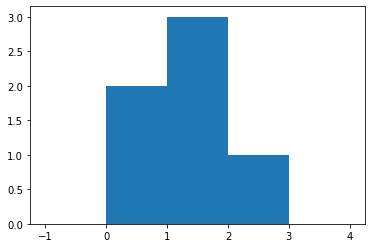

In [99]:
# plot a historgram using the bins
plt.hist(nums, bins=bins_)

In [101]:
# complex plotting is FAST
points = np.arange(-5,5, 0.001) # 1000 equally spaced points
points
xs, ys = np.meshgrid(points, points) # 2-dimensional array of all our points
%time z = np.sqrt(xs**2 + ys**2)

Wall time: 963 ms


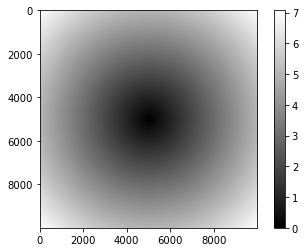

In [106]:
plt.imshow(z, cmap=plt.cm.gray) # a mesh plot using grey colour map
plt.colorbar()